# Evans SuperStore Analysis

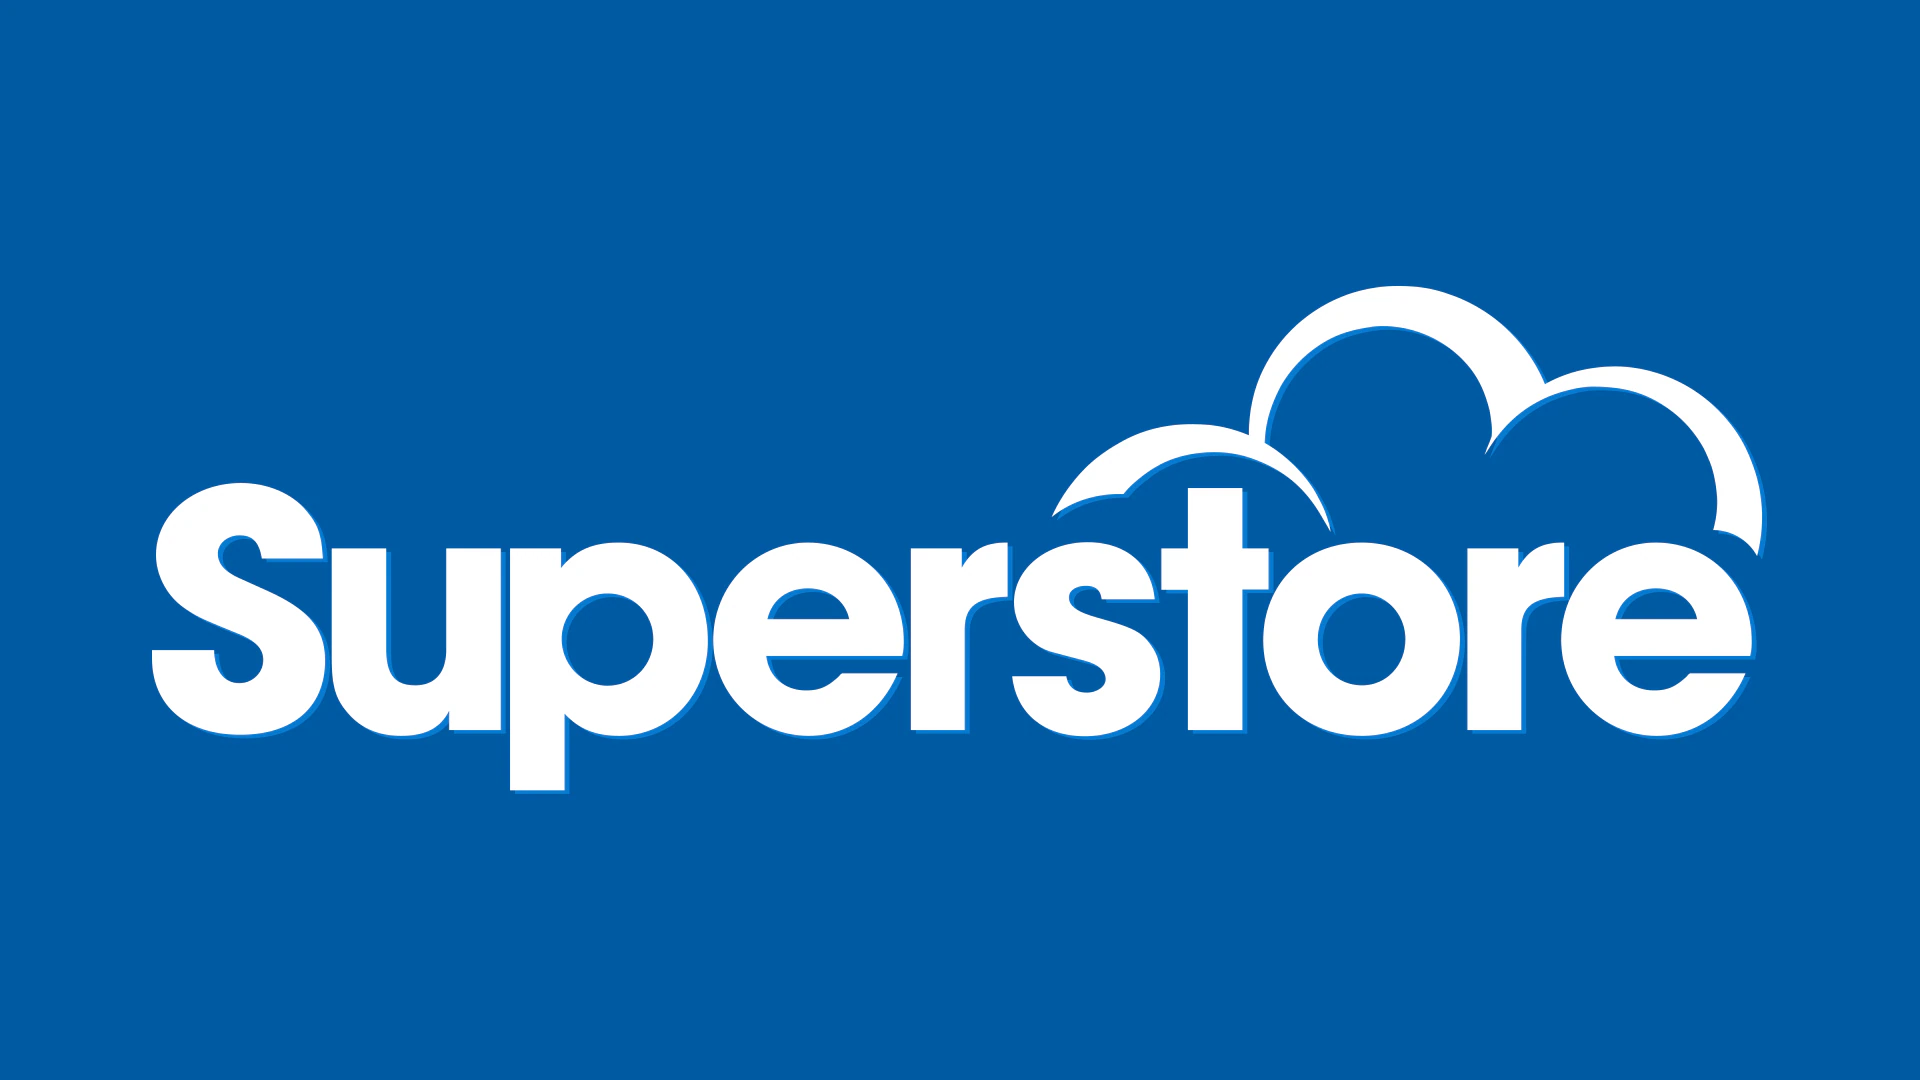

## Introduction

In today's dynamic and highly competitive retail landscape, businesses face the challenge of not only staying afloat but thriving in an environment that is constantly evolving. One such company, Evans SuperStore, has recognized the need to harness the power of data and analytics to gain a competitive edge and better understand its operations. In this context, the Evans SuperStore Analysis project aims to explore and leverage data-driven insights to improve decision-making, operational efficiency, and overall performance.

## Background

Evans SuperStore, a prominent retail chain operating across various locations, recognizes the pivotal role of data analytics in modern retail management. In an industry marked by stiff competition and evolving consumer preferences, staying ahead necessitates data-driven insights. The company is committed to harnessing the power of data analysis to enhance operational efficiency, customer satisfaction, and overall business performance.

# Business Tasks:

1. **Revenue and Quantity Trends Over Time:** Understand the historical revenue and quantity trends to uncover patterns and insights.

2. **Revenue Performance by Gender:** Analyze revenue performance by gender, both on a monthly and weekday basis.

3. **Order Contribution by Age:** Determine how different age groups contribute to the company's orders.

4. **Order Contribution by Gender:** Explore how gender impacts order patterns and contribution.

5. **State Orders and Revenue Ranking:** Identify which state has the highest order volume and revenue generation.

6. **Refund and Return Rates by Channel:** Calculate the refund and return rates for different sales channels.

7. **Quantity and Revenue per Product Category:** Examine the quantity ordered and revenue generated for each product category.

8. **Overall Delivery, Refund, Cancel, and Return Rates:** Analyze the overall performance in terms of delivery, refund, cancel, and return rates, providing critical insights into customer service and operational efficiency.






## Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime

## Importing the dataset

In [2]:
df = pd.read_excel("Evans SuperStore Sales.xlsx")

## Exploring the dataset

In [3]:
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Female,44,2022-12-04,Delivered,Mobile App,JNE1233-BLUE-KR-031-XXL,Pant,XXL,1,NGN,376,Abuja,140301,Nigeria,False
1,2,405-2183842-2225946,2183842,Female,29,2022-12-04,Delivered,Field Sales,Casual414-KR-NP-L,Casual,L,1,NGN,1449,Kano,122002,Nigeria,False
2,3,171-1641533-8921966,1641533,Female,67,2022-12-04,Delivered,Mobile App,Casual261-KR-PP-S,Casual,S,1,NGN,453,Abuja,700029,Nigeria,False
3,4,404-7490807-6300351,7490807,Female,20,2022-12-04,Delivered,Jiji,Casual110-KR-PP-M,Casual,M,1,NGN,729,Enugu,613007,Nigeria,False
4,5,403-9293516-4577154,9293516,Female,62,2022-12-04,Delivered,Mobile App,JNE2294-KR-A-XXL,Pant,XXL,1,NGN,544,Kano,122001,Nigeria,False


In [4]:
df.describe()

,index,Cust ID,Age,Qty,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047.000000,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,1.006120,682.074822,460474.587206
std,8962.64124,2.900678e+06,15.117233,0.094088,268.582173,198116.733009
min,1.00000,8.950000e+02,18.000000,1.000000,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,1.000000,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,1.000000,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,1.000000,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,5.000000,3036.000000,855117.000000


In [5]:
df.shape

(31047, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Gender            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Date              31047 non-null  datetime64[ns]
 6   Status            31047 non-null  object        
 7   Channel           31047 non-null  object        
 8   SKU               31047 non-null  object        
 9   Category          31047 non-null  object        
 10  Size              31047 non-null  object        
 11  Qty               31047 non-null  int64         
 12  currency          31047 non-null  object        
 13  Amount            31047 non-null  int64         
 14  ship-state        3104

In [7]:
df.isnull().sum()

index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64

In [8]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

In [9]:
# renaming the Channel column to remove white spaces
df.rename(columns = {"Channel ": "Channel"}, inplace = True)

## Transforming the dataset

In [10]:
# creating a revenue column

df["Revenue"] = (df["Qty"]*df["Amount"])
df.head(3)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-state,ship-postal-code,ship-country,B2B,Revenue
0,1,171-1029312-3038738,1029312,Female,44,2022-12-04,Delivered,Mobile App,JNE1233-BLUE-KR-031-XXL,Pant,XXL,1,NGN,376,Abuja,140301,Nigeria,False,376
1,2,405-2183842-2225946,2183842,Female,29,2022-12-04,Delivered,Field Sales,Casual414-KR-NP-L,Casual,L,1,NGN,1449,Kano,122002,Nigeria,False,1449
2,3,171-1641533-8921966,1641533,Female,67,2022-12-04,Delivered,Mobile App,Casual261-KR-PP-S,Casual,S,1,NGN,453,Abuja,700029,Nigeria,False,453


In [11]:
# splitting the Date column

df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()

df.head(3)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,Qty,currency,Amount,ship-state,ship-postal-code,ship-country,B2B,Revenue,Day,Month
0,1,171-1029312-3038738,1029312,Female,44,2022-12-04,Delivered,Mobile App,JNE1233-BLUE-KR-031-XXL,Pant,...,1,NGN,376,Abuja,140301,Nigeria,False,376,Sunday,December
1,2,405-2183842-2225946,2183842,Female,29,2022-12-04,Delivered,Field Sales,Casual414-KR-NP-L,Casual,...,1,NGN,1449,Kano,122002,Nigeria,False,1449,Sunday,December
2,3,171-1641533-8921966,1641533,Female,67,2022-12-04,Delivered,Mobile App,Casual261-KR-PP-S,Casual,...,1,NGN,453,Abuja,700029,Nigeria,False,453,Sunday,December


## Overview

In [368]:
print("Total Revenue is", df["Revenue"].sum())
print ("Total Orders is", df["Order ID"].count())
print ("Total Quantity is", df["Qty"].sum())
print ("Total Channel is", df["Channel"].nunique())
print ("Total States is", df["ship-state"].nunique())
print ("Total Customers is", df["Cust ID"].nunique())
print ("The Year considered is", df["Date"].dt.year.max())

Total Revenue is 21441209
Total Orders is 31047
Total Quantity is 31237
Total Channel is 7
Total States is 9
Total Customers is 28437
The Year considered is 2022


##  Revenue and Quantity trend over time.

In [12]:
# revenue and quantity ordered by day of week

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sales_day = df.pivot_table(index = ["Day"],
                          values = ["Qty","Revenue"],
                          aggfunc = sum).reindex(days_of_week)
sales_day

,Qty,Revenue
Day,,
Monday,4047,2755130
Tuesday,5564,3809368
Wednesday,4369,2988072
Thursday,3212,2228882
Friday,4548,3143320
Saturday,4753,3236298
Sunday,4744,3280139


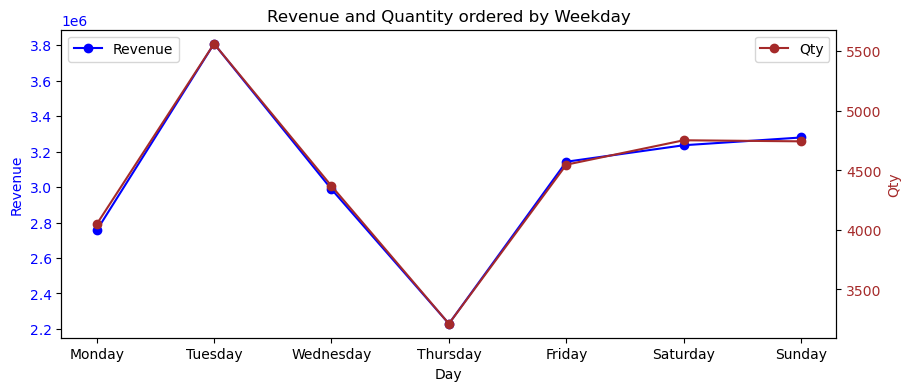

In [267]:
# plotting the chart for revenue and quantity ordered by day of week

fig, ax1 = plt.subplots(figsize=(10,4))

sales_day["Revenue"].plot(kind = "line", ax = ax1, marker = "o", color = "b")
ax1.set_ylabel("Revenue", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.legend(loc="upper left")


ax2 = ax1.twinx()

sales_day["Qty"].plot(kind = "line", ax = ax2, marker = "o",color = "brown")
ax2.set_ylabel("Qty", color="brown")
ax2.tick_params(axis="y", labelcolor="brown")
ax2.legend(loc="upper right")

plt.title("Revenue and Quantity ordered by Weekday")
plt.show()

Tuesdays stand out as the top-performing weekday, achieving the highest revenue of 3,809,368 naira and the largest quantity of orders, reaching 5,564. In contrast, Thursdays are characterized as the least performing weekday, with the lowest revenue of 2,228,882 naira and the lowest quantity of orders, totaling 3,212. These insights underscore the significance of understanding and optimizing sales performance across different weekdays for effective business strategies.

In [14]:
# revenue and quantity ordered by Month

months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

sales_month = df.pivot_table(index = "Month",
                              values = ["Qty","Revenue"],
                              aggfunc = sum).reindex(months)
sales_month

,Qty,Revenue
Month,,
January,2717,1839113
February,2770,1900550
March,2843,1961232
April,2704,1854665
May,2641,1833460
June,2612,1768326
July,2592,1794794
August,2629,1826937
September,2508,1715429


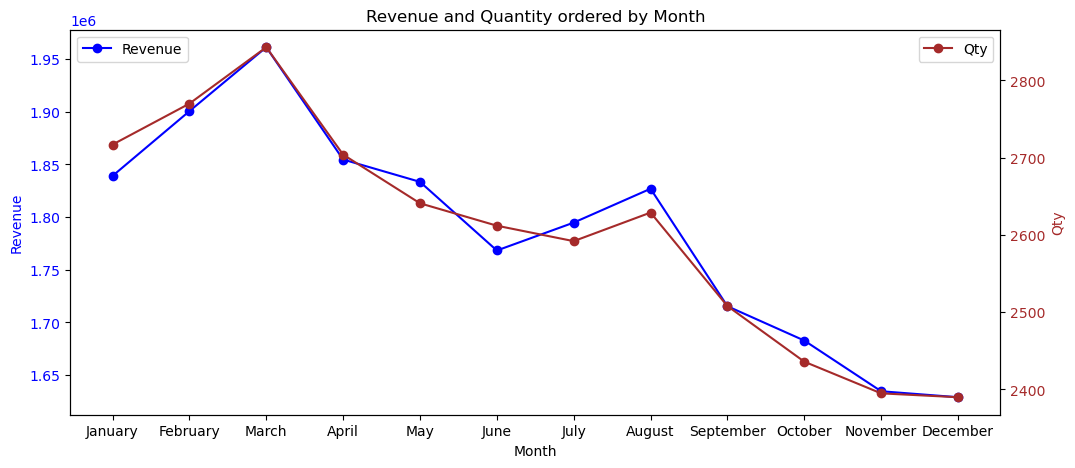

In [266]:
# plotting the chart for revenue and quantity ordered by month

fig, ax1 = plt.subplots(figsize = (12,5))

sales_month["Revenue"].plot(kind = "line", marker = "o", color = "b", ax = ax1)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_ylabel("Revenue", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()

sales_month["Qty"].plot(kind = "line", marker  = "o", color = "brown", ax = ax2)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_ylabel("Qty", color="brown")
ax2.tick_params(axis="y", labelcolor="brown")
ax2.legend(loc="upper right")


plt.title("Revenue and Quantity ordered by Month")
plt.show()


March emerges as the standout top-performing month, with the highest revenue of 1,961,232 naira and the largest number of orders, totaling 2,843. In contrast, December is marked as the least performing month, with the lowest revenue of 1,629,085 naira and the lowest quantity of orders, amounting to 2,390. These insights emphasize the importance of comprehending and enhancing sales performance across different months to inform effective business strategies.

## Revenue performance per Gender by Month and Weekday


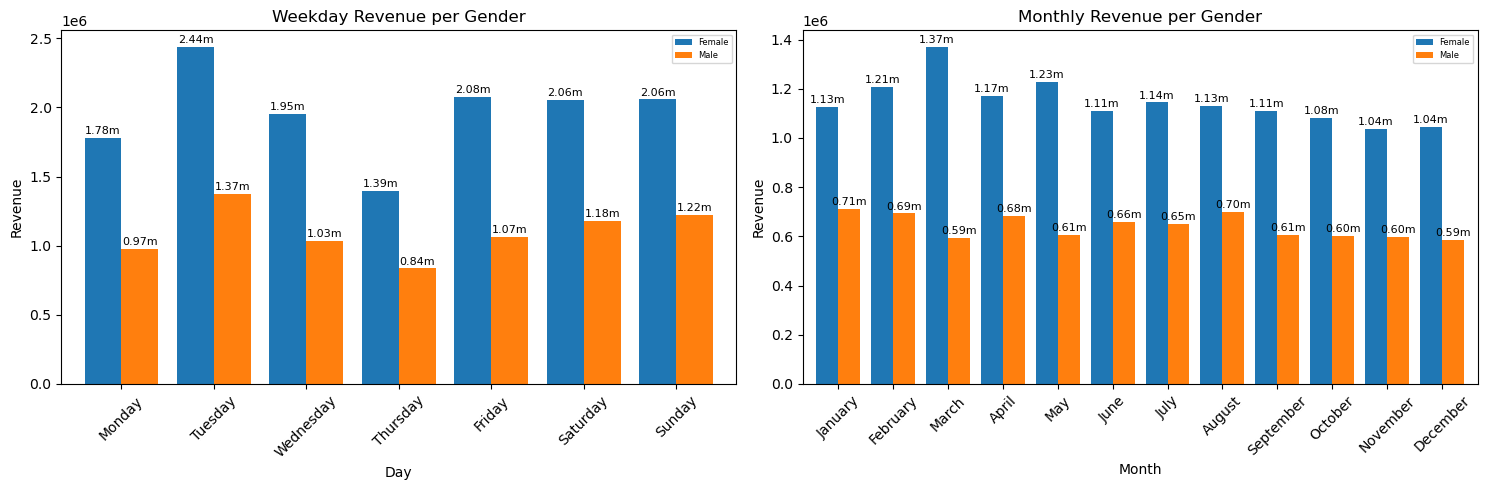

In [333]:
# calculting the revenue performance per gender by month and weekday

Gender_revenue_day = df.groupby(["Gender","Day"])["Revenue"].sum().unstack("Gender").reindex(days_of_week)
Gender_revenue_month = df.groupby(["Gender","Month"])["Revenue"].sum().unstack("Gender").reindex(months)

# plotting the chart for revenue performance per gender by month and weekday

fig,(ax1,ax2)=plt.subplots(ncols = 2,figsize=(15,5))

Gender_revenue_day.plot(kind = "bar", width = 0.8, ax = ax1)
ax1.set_title("Weekday Revenue per Gender")
ax1.set_ylabel("Revenue")
ax1.legend(loc = "upper right", fontsize = 6)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
for p in ax1.patches:
    label = f"{p.get_height() / 1e6:.2f}m"
    ax1.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")


Gender_revenue_month.plot(kind = "bar",width = 0.8, ax = ax2)
ax2.set_title("Monthly Revenue per Gender")
ax2.set_ylabel("Revenue")
ax2.legend(loc = "upper right", fontsize = 6)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45)
for p in ax2.patches:
    label = f"{p.get_height() / 1e6:.2f}m"
    ax2.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")

plt.tight_layout()
plt.show()

The data analysis reveals that both male and female customers achieve their highest revenue on Tuesdays, contributing 1.37 million naira and 2.44 million naira, respectively. It's noteworthy that male customers perform exceptionally well in terms of revenue in January, recording their highest revenue of 711,912 naira, while female customers shine in March, recording their highest revenue at 1.37 million naira.

These insights strongly suggest that, on average, female customers are the primary drivers of revenue. Understanding these patterns can guide targeted marketing and engagement strategies to capitalize on the substantial revenue potential presented by the female customer segment.

## Order contribution per Age

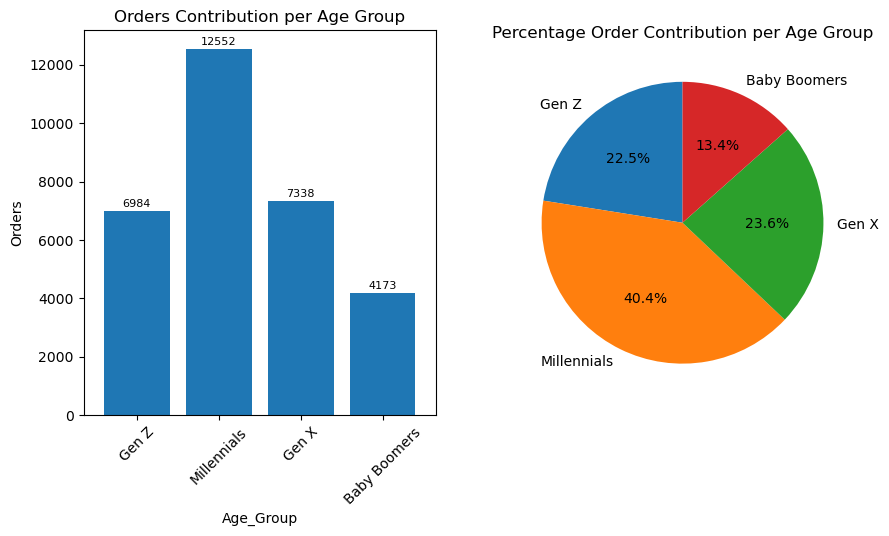

In [332]:
# Segmenting the Age into different Age Groups

bins = [0,26,42,58,80]
Labels = ["Gen Z","Millennials","Gen X","Baby Boomers"]
df["Age_Group"] = pd.cut(df["Age"],bins=bins,labels=Labels)

#calculating orders per Age_group

Age_group_orders = df.groupby(["Age_Group"])["Order ID"].size()

# plotting the chart for Order Contribution per Age.

fig,(ax1,ax2)=plt.subplots(ncols = 2,figsize = (10,5))

Age_group_orders.plot(kind  = "bar", width = 0.8, ax = ax1)
ax1.set_title("Orders Contribution per Age Group")
ax1.set_ylabel("Orders")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")
    
Age_group_orders.plot(kind = "pie", autopct = "%1.1f%%",startangle = 90, ax = ax2)
ax2.set_title("Percentage Order Contribution per Age Group")
ax2.set_ylabel("")

plt.show()

Millennials, aged between 27 and 42 years, constitute the largest segment in terms of orders received, accounting for a total of 12,552 orders, which represents 40.4% of the overall order volume. In contrast, the Baby Boomer generation, ranging from 59 to 80 years, has the lowest number of orders, recording a total of 4,173 orders, equivalent to 13.4% of the total orders received.

## Order contribution per Gender

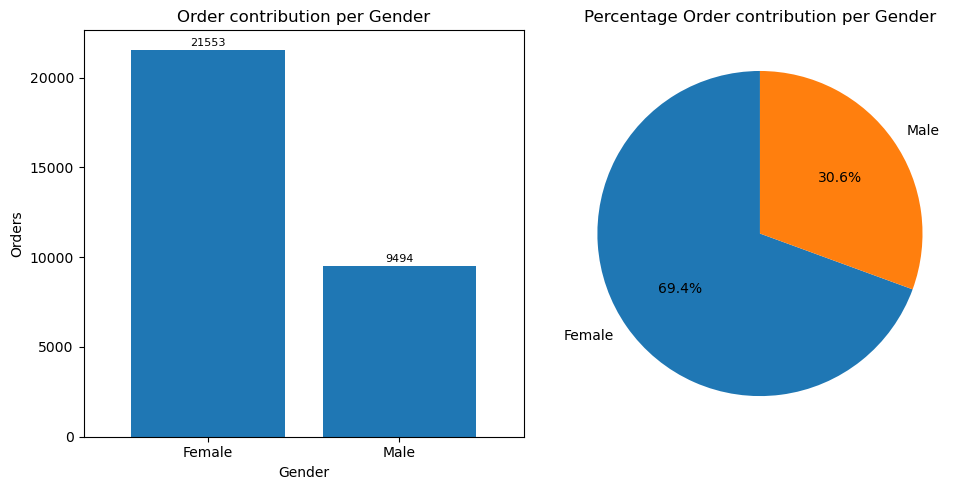

In [331]:
# Order contribution per Gender

Orders_gender = df.groupby(["Gender"])["Order ID"].count()

# plotting the chart for order contribution per gender

fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (10,5))

Orders_gender.plot(kind = "bar",width = 0.8, ax = ax1)
ax1.set_ylabel("Orders")
ax1.set_title("Order contribution per Gender")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 0)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")
    

Orders_gender.plot(kind = "pie",autopct="%1.1f%%",startangle=90, ax = ax2)

ax2.set_ylabel("")
ax2.set_title("Percentage Order contribution per Gender")

plt.tight_layout()
plt.show()

Female customers constitute the largest segment in terms of orders received, accounting for a total of 21,553 orders, which represents 69.4% of the overall order volume. In contrast, the Male customers has the lowest number of orders, recording a total of 9,494 orders, equivalent to 30.6% of the total orders received.

## Orders and Revenue per State

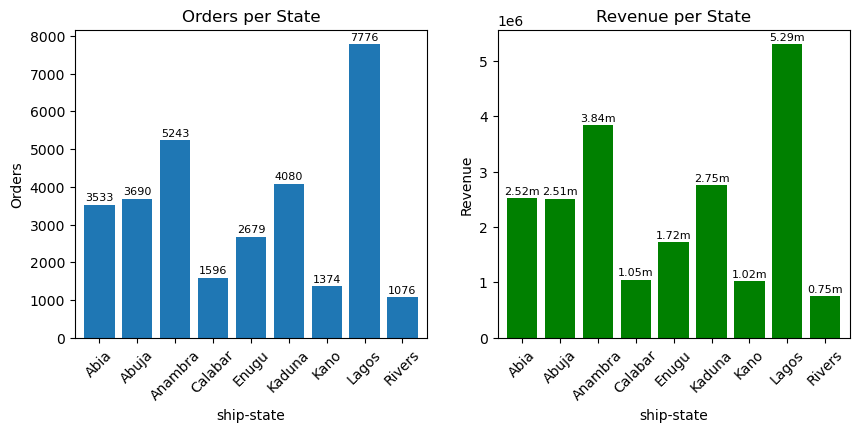

In [330]:
# calculating the orders and revenue per state 

Orders_state = df.groupby(["ship-state"])["Order ID"].size()
Revenue_state = df.groupby(["ship-state"])["Revenue"].sum()

# plotting the chart for orders and revenue per state

fig,(ax1,ax2)=plt.subplots(ncols = 2,figsize = (10,4))

Orders_state.plot(kind = "bar", ax = ax1,width = 0.8)
ax1.set_title("Orders per State")
ax1.set_ylabel("Orders")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 45)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")

Revenue_state.plot(kind = "bar", ax = ax2,width = 0.8, color = "green")
ax2.set_title("Revenue per State")
ax2.set_ylabel("Revenue")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45)
for p in ax2.patches:
    label = f"{p.get_height() / 1e6:.2f}m"
    ax2.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")

plt.show()

Lagos State stands out as the top-performing region, registering the highest number of orders at 7,776 and generating a revenue of 5.29 million naira. In contrast, Rivers State emerges as the least performing area, with a total of 1,076 orders and a revenue of 0.75 million naira. These figures highlight Lagos as the leading state in terms of orders and revenue, while Rivers trails as the least performing state.

## Refund and Return rate per Channel

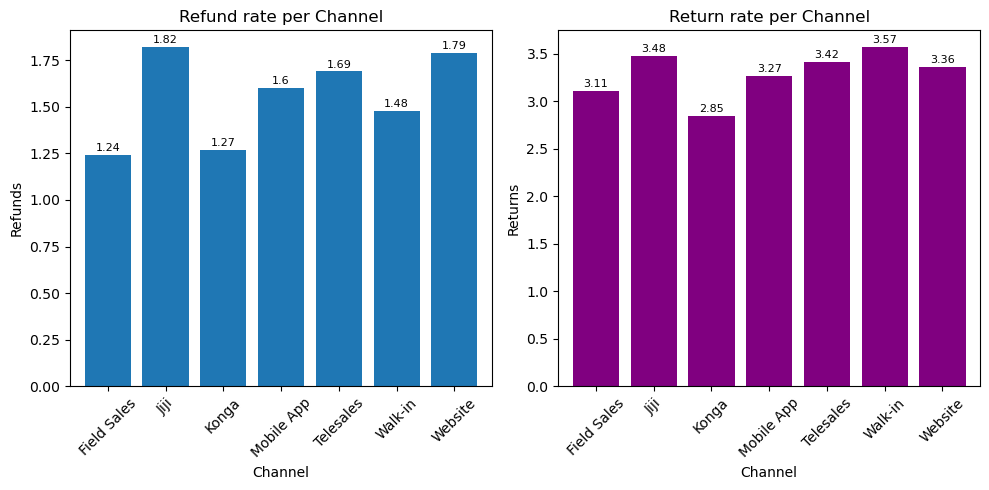

In [285]:
# calculating the Refund and Return Rate per channel

Refund_rate_channel = round(df.loc[df["Status"]=="Refunded"].groupby("Channel").size()/df.groupby(["Channel"])["Order ID"].size()*100,2)
Return_rate_channel = round(df.loc[df["Status"]=="Returned"].groupby("Channel").size()/df.groupby(["Channel"])["Order ID"].size()*100,2)

# plotting the chart for the refund and return rate per channel

fig,(ax1,ax2)=plt.subplots(ncols = 2, figsize=(10,5))

Refund_rate_channel.plot(kind = "bar", width = 0.8,ax = ax1)
ax1.set_title("Refund rate per Channel")
ax1.set_ylabel("Refunds")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")

    
Return_rate_channel.plot(kind = "bar", width = 0.8, color = "purple",ax = ax2)
ax2.set_title("Return rate per Channel")
ax2.set_ylabel("Returns")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")

    
plt.tight_layout()
plt.show()


The Jiji channel reported the highest refund rate at 1.82, while the Field Sales channel achieved the lowest refund rate, marked at 1.24. On the other hand, the Walk-in channel recorded the highest return rate, totaling 3.57, while the Konga channel reported the lowest return rate, standing at 2.85.

## Revenue and Orders per Product Category

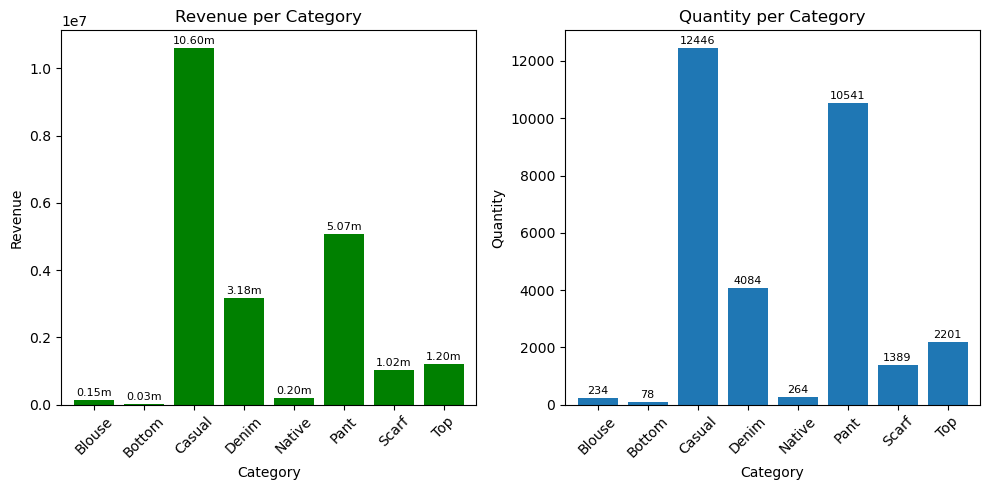

In [329]:
# calculating the revenue and quantity ordered per product category

Category_revenue = df.groupby(["Category"])["Revenue"].sum()
Category_quantity = df.groupby(["Category"])["Qty"].sum()

# plotting the chart for revenue and orders per product category

fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (10,5))

Category_revenue.plot(kind = "bar", width = 0.8,color = "green", ax = ax1)
ax1.set_title("Revenue per Category")
ax1.set_ylabel("Revenue")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
for p in ax1.patches:
    label = f"{p.get_height() / 1e6:.2f}m"
    ax1.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")


Category_quantity.plot(kind = "bar", width = 0.8, ax = ax2)
ax2.set_title("Quantity per Category")
ax2.set_ylabel("Quantity")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45)
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", fontsize=8, color="black", xytext=(0, 5),
                textcoords="offset points")

plt.tight_layout()
plt.show()

The standout product category is "Casual," which has generated a substantial total revenue of 10.60 million naira, accompanied by a remarkable 12,446 orders. In stark contrast, the "Bottom" category stands as the least performing, yielding minimal revenue of less than 30,000 naira and receiving only 78 orders.

 ## Overall Delivery rate, Refund rate, Cancel rate and Return rate.

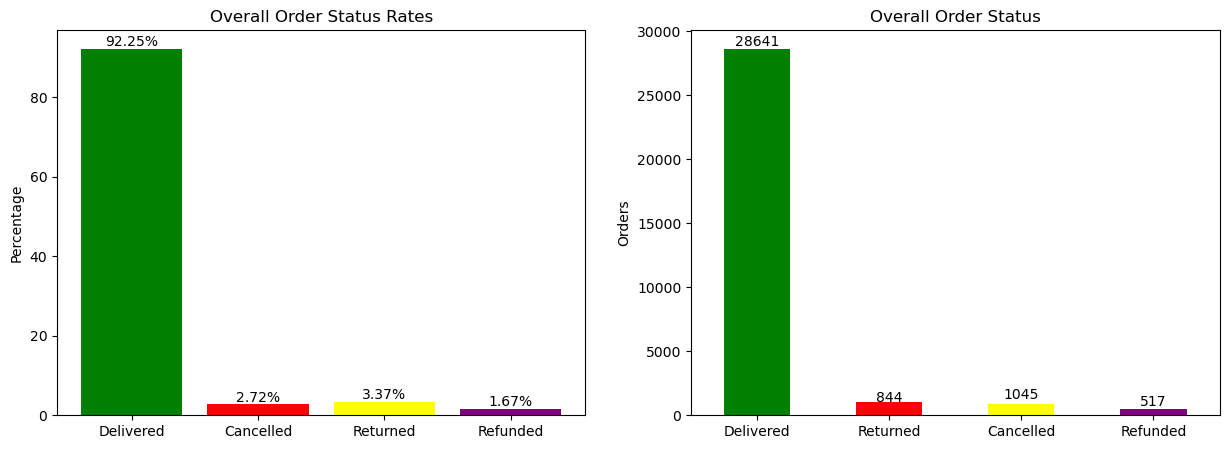

In [352]:
# calculating the order status rates

overall_delivery_rate = round((df["Status"] == "Delivered").sum()/len(df)*100,2)
overall_cancel_rate = round((df["Status"] == "Cancelled").sum()/len(df)*100,2)
overall_return_rate = round((df["Status"] == "Returned").sum()/len(df)*100,2)
overall_refund_rate = round((df["Status"] == "Refunded").sum()/len(df)*100,2)

# segmenting the order status
 
categories = ["Delivered", "Cancelled", "Returned", "Refunded"]
rates = [overall_delivery_rate, overall_cancel_rate, overall_return_rate, overall_refund_rate]
colors = ['green', 'red', 'yellow', 'purple']

# plotting the chart for the order status rates and order status numbers

fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize = (15,5))

ax1.bar(categories, rates, color= colors)
ax1.set_title("Overall Order Status Rates")
ax1.set_ylabel("Percentage")

for i, rate in enumerate(rates):
    ax1.text(i, rate, f"{rate}%", ha="center", va="bottom")
    
df["Status"].value_counts().plot(kind = "bar", color = colors, ax = ax2)
ax2.set_title("Overall Order Status")
ax2.set_ylabel("Orders")

for i, count in enumerate(Count):
    ax2.text(i, count, f"{count}", ha="center", va="bottom")


plt.xticks(rotation=0)

plt.show()

In summary, the analysis reveals that 92.25% of all orders received were successfully delivered, representing approximately 28,641 orders. In contrast, 2.72% of orders, which amounts to 844, were cancelled, while 3.37% (1,045 orders) were returned. Additionally, 1.67% of orders (517 in total) were refunded.

## Conclusion

The analysis of various aspects of Evans SuperStore's operations provides valuable insights into the performance and trends within the business. Here are the key takeaways:

1. **Weekdays Performance:** Tuesdays emerge as the top-performing weekday, showcasing the highest revenue and order quantity, while Thursdays lag behind as the least performing weekday. This underlines the need to focus on optimizing sales performance throughout the week, particularly on less active days.

2. **Monthly Performance:** March shines as the standout top-performing month, with robust revenue and order numbers, whereas December falls behind as the least performing month. This highlights the significance of understanding and enhancing sales performance across different months for more effective business strategies.

3. **Gender and Revenue:** The data reveals that both male and female customers achieve their highest revenue on Tuesdays. Male customers excel in January, while female customers shine in March, suggesting a need for targeted marketing and engagement strategies.

4. **Age Segments:** Millennials contribute the highest number of orders, accounting for a significant share of the total order volume. In contrast, the Baby Boomer generation records fewer orders, emphasizing the importance of catering to different age segments effectively.

5. **Gender and Orders:** Female customers constitute the largest segment in terms of orders, indicating their significant role in driving order volume. Understanding the ordering patterns of different genders is vital for effective business strategies.

6. **State Performance:** Lagos State leads with the highest number of orders and revenue, while Rivers State lags as the least performing area. This highlights the regional variations in performance and the potential for targeted efforts.

7. **Channel Refund and Return Rates:** Different sales channels have varying refund and return rates, with Jiji channel having the highest refund rate, and the Walk-in channel recording the highest return rate. Optimizing these rates can enhance customer satisfaction and operational efficiency.

8. **Product Categories:** "Casual" is the top-performing product category, generating substantial revenue and orders, while "Bottom" emerges as the least performing category. Diversifying product offerings and focusing on popular categories can improve performance.

9. **Delivery and Order Status:** A significant percentage of orders are successfully delivered. Understanding and monitoring delivery, refund, cancel, and return rates are crucial for maintaining customer satisfaction and operational efficiency.


## Recommendations

Based on the findings, the following recommendations can help Evans SuperStore optimize its operations and enhance its overall performance:

1. Implement weekday-specific marketing and promotions to maximize sales on high-performing days like Tuesdays, and develop strategies to improve performance on less active days, particularly Thursdays.

2. Tailor marketing campaigns and promotions to leverage the high-performance months like March, and consider adjusting strategies for the less active months, such as December.

3. Create gender-specific marketing strategies and incentives to capitalize on the revenue potential of male and female customers.

4. Develop targeted products and marketing approaches for Millennials, considering their significant share of orders. Ensure that there are offerings appealing to Baby Boomers as well.

5. Invest in understanding and catering to the preferences of female customers, who constitute the majority of orders.

6. Consider expanding or optimizing operations in Lagos State, while analyzing the performance in Rivers State to identify growth opportunities.

7. Evaluate the performance of different sales channels and consider adjustments to improve refund and return rates.

8. Focus on popular product categories like "Casual" to drive revenue, and consider reviewing or promoting the "Bottom" category to enhance performance.

9. Continuously monitor delivery, refund, cancel, and return rates to maintain high customer satisfaction and operational efficiency.

By implementing these recommendations, Evans SuperStore can fine-tune its strategies, enhance customer satisfaction, and drive greater success in the dynamic retail landscape.